In [16]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import math

In [17]:
df2 = pd.read_csv('data_csv.csv', index_col='loan_applicant_id')
df2.head()
df2 = df2.dropna()

# df2 = pd.read_csv('application_train.csv/application_train.csv')#, index_col='SK_ID_CURR')
# df2.head()

In [18]:
x = df2['household_income'].values
y = df2['y'].values
print(x,y, sep="\n")
print(type(x), type(y), sep="\n")

# x = df2['AMT_INCOME_TOTAL'].values
# y1 = df2['TARGET'].values
# y = np.array([1 if i==0 else 0 for i in y1])
# print(x,y,len(x),len(y), sep="\n")
# print(type(x), type(y), sep="\n")

[192  57 212 ... 264  56 240]
[1 0 0 ... 1 0 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


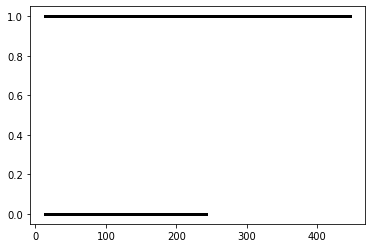

In [19]:
plt.scatter(x, y, color="black", marker = "X", s=3)

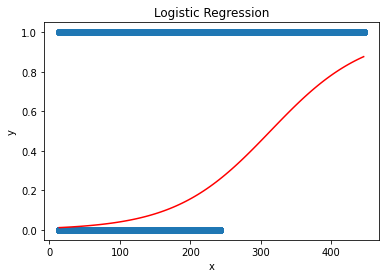

In [20]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)


# # Visualising the Training set results
plt.scatter(x_test, y_test)

# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')

# show the scatter plot and line plot on the same graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.show()

In [21]:
def f(x, b, mu, sigma):#,scal):
    # print(x)?
    # result = []
    # for x_ in x:
    #     b_over = b/x_
    #     if b_over <= 0:
    #         print(b,x,b_over)
    #     lnb = math.log(b_over)
    #     term_2 = mu - (sigma**2)/2
    #     lnb = lnb - term_2
    #     lnb = lnb/sigma
    #     lnb = norm.cdf(lnb)
    #     result.append(lnb)
        # print(lnb)
    b_over = [math.log(b/x_) for x_ in x]
    # lnb = np.log(b_over)
    term_2 = mu - (sigma**2)/2
    result = [x_ - term_2 for x_ in b_over]
    result = [temp/sigma for temp in result]
    result = [norm.cdf(temp) for temp in result]
    result = [1-temp for temp in result]
    # result = [scal*temp for temp in result]



    # print(result)
    # result = []
    # for arr in b_over:
    #     # print(arr)
    #     arr = arr - term_2
    #     result.append(arr)
    
    # result = [i if type(i) =="float" else i[0] for i in lnb]
    # result = [i[0] - term_2 for i in lnb]
    # print(lnb, result)
    return result

In [22]:
popt, pcov = curve_fit(f, 
                       x_train.astype(float), 
                       y_train.astype(float),
                    #    p0=[1,1,1],
                       bounds=([0,-1* math.inf,0], [np.inf, np.inf, np.inf]),
                     #   bounds=([0,-1* math.inf,0, -1* math.inf], [np.inf, np.inf, np.inf, 0]),
                       maxfev=1000)

# when b is positive the curve is concave and it doesn't work
# adding a scalar that can curve eitehr


In [23]:
print(popt, pcov, sep="\n")
# pcov

[ 1.62148437e+01 -2.70446637e+00  7.66711433e-04]
[[ 3.05881862e-06 -4.95987004e-05  2.62243232e-05]
 [-4.95987004e-05  8.04242221e-04 -4.25227027e-04]
 [ 2.62243232e-05 -4.25227027e-04  2.24846168e-04]]


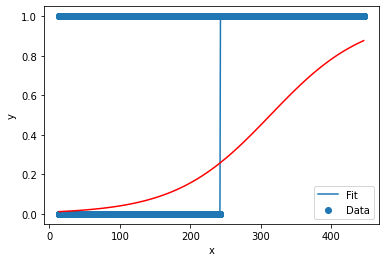

In [40]:
# plot the original data
plt.scatter(x_test, y_test, label='Data')
# Ommitted
# plt.xlim([240, 245])
# plot the fitted curve
xfit = np.linspace(x_test.min(), x_test.max(), 100000)
yfit = f(xfit, *popt)
plt.plot(xfit, yfit, label='Fit')
# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')
# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# plt.xlim([240, 245])
# Save the plot to a file
plt.savefig('plots/myplot.png')

# Show the plot
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
predictions = f(x_test, *popt)
print(mean_squared_error(y_test, predictions))

0.06137496896334954


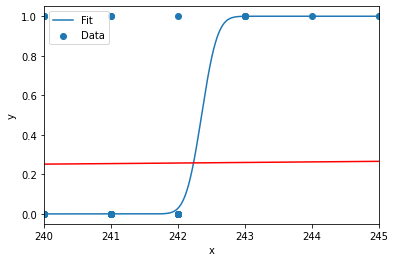

In [42]:
# plot the original data
plt.scatter(x_test, y_test, label='Data')
# Ommitted
# plt.xlim([240, 245])
# plot the fitted curve
xfit = np.linspace(x_test.min(), x_test.max(), 100000)
yfit = f(xfit, *popt)
plt.plot(xfit, yfit, label='Fit')
# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')
# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.xlim([240, 245])
# Save the plot to a file
plt.savefig('plots/myplot1.png')

# Show the plot
plt.show()